In [163]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
data = pd.read_csv("housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [165]:
data = data.loc[:,data.columns != 'ocean_proximity']
data = data.fillna(data.median(axis=0), axis=0)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [167]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data_numerical = data[numerical_columns]
data = (data_numerical - data_numerical.mean()) / data_numerical.std()

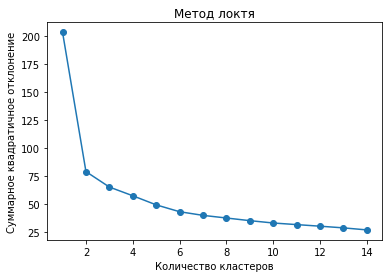

In [168]:
data2 = data.iloc[:,[0,1]]
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data2)
    inertia.append(np.sqrt(kmeans.inertia_)) 
plt.figure()
plt.plot(range(1, 15), inertia, marker='o'); 
plt.title('Метод локтя') 
plt.xlabel('Количество кластеров')
plt.ylabel('Суммарное квадратичное отклонение') 
plt.show()

/var/folders/z2/zq9zxt7j1h9gzm_byhy_v4dw0000gn/T/ipykernel_2333/1234027718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["label"] = clusters


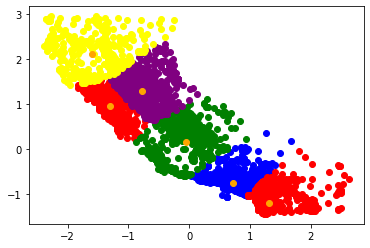

In [169]:
kmean = KMeans(n_clusters=6)
clusters = kmean.fit_predict(data2)
data2["label"] = clusters
plt.scatter(data2.longitude[data2.label == 0], data2.latitude[data2.label == 0], color="red")
plt.scatter(data2.longitude[data2.label == 1], data2.latitude[data2.label == 1], color="blue")
plt.scatter(data2.longitude[data2.label == 2], data2.latitude[data2.label == 2], color="green")
plt.scatter(data2.longitude[data2.label == 3], data2.latitude[data2.label == 3], color="purple")
plt.scatter(data2.longitude[data2.label == 4], data2.latitude[data2.label == 4], color="yellow")
plt.scatter(data2.longitude[data2.label == 5], data2.latitude[data2.label == 5], color="red")
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], color="orange") 
plt.show()

In [170]:
from sklearn.metrics import silhouette_score
silhouette_score(data2, kmean.labels_)

0.8151111082228131

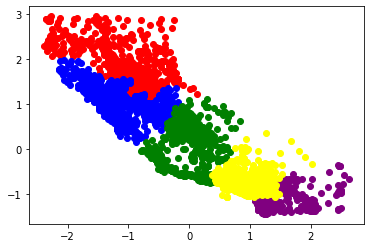

In [171]:
data3 = data2.iloc[:,data2.columns != 'label']
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(data3)
data3["label"] = cluster
plt.scatter(data3.longitude[data3.label == 0], data3.latitude[data3.label == 0], color="red")
plt.scatter(data3.longitude[data3.label == 1], data3.latitude[data3.label == 1], color="blue")
plt.scatter(data3.longitude[data3.label == 2], data3.latitude[data3.label == 2], color="green")
plt.scatter(data3.longitude[data3.label == 3], data3.latitude[data3.label == 3], color="purple")
plt.scatter(data3.longitude[data3.label == 4], data3.latitude[data3.label == 4], color="yellow")
plt.scatter(data3.longitude[data3.label == 5], data3.latitude[data3.label == 5], color="red")

In [14]:
silhouette_score(data3, hiyerartical_cluster.labels_)

0.7274235653604043

In [16]:
#PCA

In [172]:
data = pd.read_csv("housing.csv")
data.loc[(data.ocean_proximity == 'NEAR BAY'), 'ocean_proximity'] = 0
data.loc[(data.ocean_proximity == '<1H OCEAN'), 'ocean_proximity'] = 1
data.loc[(data.ocean_proximity == 'INLAND'), 'ocean_proximity'] = 2
data.loc[(data.ocean_proximity == 'NEAR OCEAN'), 'ocean_proximity'] = 3
data.loc[(data.ocean_proximity == 'ISLAND'), 'ocean_proximity'] = 4
data['ocean_proximity'] = data['ocean_proximity'].astype('float')
data= data.fillna(data.median(axis=0), axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [173]:
X = data.drop(('ocean_proximity'), axis=1) 
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [174]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [175]:
from sklearn.model_selection import train_test_split
X = X_scaled
y = data['ocean_proximity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print ('Ошибка на обучающей выборке:', err_train)
print ('Ошибка на тестовой выборке:', err_test)

Ошибка на обучающей выборке: 0.13240586932447398
Ошибка на тестовой выборке: 0.19186046511627908


In [176]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn.predict(X_test)) 
print ('accuracy:',accuracy)

accuracy: 0.8081395348837209


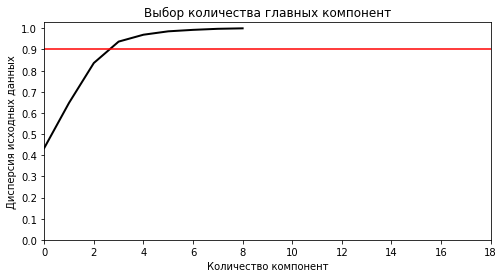

In [177]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.figure(figsize=(8,4)) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2) 
plt.title('Выбор количества главных компонент') 
plt.xlabel('Количество компонент')
plt.ylabel('Дисперсия исходных данных') 
plt.xlim(0, 18) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.axhline(0.9, c='r')
plt.show();

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (20640, 9)
Форма массива после сокращения размерности: (20640, 3)


In [185]:
X = X_pca 
y = data['ocean_proximity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print ('Ошибка на обучающей выборке:', err_train)
print ('Ошибка на тестовой выборке:', err_test) 

Ошибка на обучающей выборке: 0.21414728682170542
Ошибка на тестовой выборке: 0.29085917312661497


In [186]:
accuracy = accuracy_score(y_test, knn.predict(X_test)) 
print ('accuracy:',accuracy)

accuracy: 0.709140826873385
